In [1]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

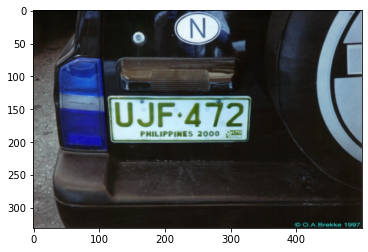

In [2]:
# Read# Read the image
image = cv2.imread('car2.jpg')
image = imutils.resize(image, width=500 )

# Display
plt.imshow(image)

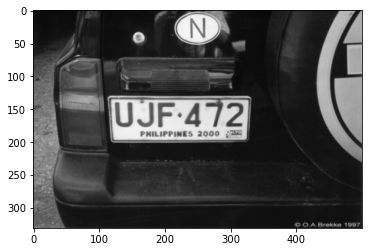

In [3]:
# Gray the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

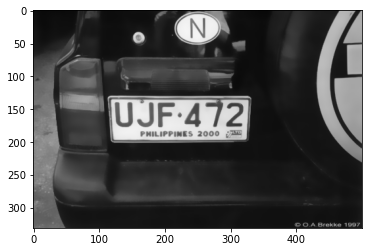

In [4]:
# Smooth the image
smooth = cv2.bilateralFilter(gray_image, 13, 15, 15) 

# Display
plt.imshow(cv2.cvtColor(smooth, cv2.COLOR_BGR2RGB))

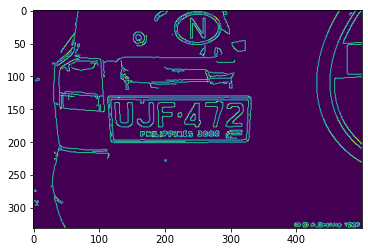

In [5]:
# Edge detection
edged = cv2.Canny(smooth, 30, 200) 

# Display
plt.imshow(edged)

In [6]:
# Fnd Contour - try to find the shapes
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_TREE - traverse the tree to find different level of contours
# cv2.CHAIN_APPROX_SIMPLE - return result
# Approximates the contour

contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [7]:
location = None
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.018 * peri, True)
    if len(approx) == 4:
        location = approx
        break
        
location

array([[[113, 132]],

       [[122, 201]],

       [[328, 195]],

       [[327, 130]]], dtype=int32)

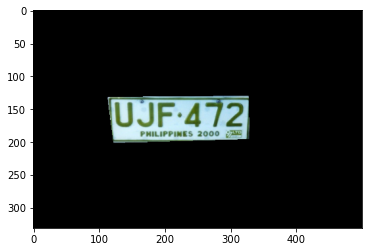

In [8]:
# Apply masking
mask = np.zeros(gray_image.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(new_image)

In [9]:
import easyocr

In [10]:
reader = easyocr.Reader(['en'])
result = reader.readtext(new_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[116, 130], [328, 130], [328, 186], [116, 186]],
  'UJF472',
  0.46185138847720414),
 ([[161, 181], [287, 181], [287, 197], [161, 197]],
  'Philippines 2000',
  0.17726041667645542),
 ([[291, 181], [319, 181], [319, 195], [291, 195]], 'ULE', 0.125510573387146)]

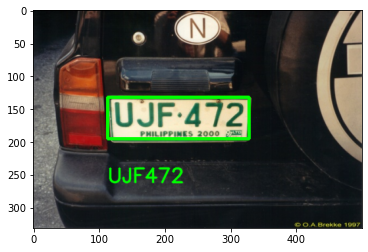

In [11]:
# Render results
text = result[0][-2] 
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))